**Tyler Hilbert | mattplotlib Challenge | February 17**

In [51]:
#importing our libraries into the Jupyter notebook to use them
import pandas as pd
import matplotlib.pyplot as plt

##### Discussion of Visualization from Wilke

A visualization that we did not talk about in class would be the *Violins* visualization for distribution data (Wilke, 2019, Sect. 5.2). In my current role, most of my data visualizations fall in the proportional data, more specifically using bar charts to signify how many students are in a major at a given point in time. I think the next logical step for my data analysis is branching out and conducting some analysis of the distribution of the data I gather. I think the violin visualization would be a great step into this, as looking at the violin visualizations provided via the reading material make more sense to me than similar visualizations. I think a good use of this visualization would be showing grade data. A violin chart could show the range of grades a student got across an assignment or across multiple sections of a course. This could compare student performance across fields like modality and instructor. This would allow leadership to review things like academic performance in courses and how certain factors, like modality or instructor, could influence academic performance. Going beyond a single term, the data could be used to show how changes to content (i.e. adjusting a course from being lecture heavy to more discussion heavy) influence students ability to perform in the course. Another way this visualization could be useful is analyzing survey data. Part of my role involves analyzing surveys of student performance, such as internship evaluations or portfolio reviews. A violin visualization could help me see how students perform across multiple terms. I would need to assign my data numerical values though - most of my surveys use Likert Scale ratings, so I may need to conduct some data manipulation to get it to work.

##### Importing the ccecs_example_data.csv file

In [52]:
#reading and assigning a variable to the cces file, then running .head() to make sure it works properly.
ces = pd.read_csv("cces_example_data.csv")
ces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [53]:
#converting it into a DataFrame, then running .head() to make sure it works properly
ces = pd.DataFrame(ces)
ces.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


In [ ]:
ces.keys() #I wanted a quick reference for the different keys for referencing, so ran keys to see them.

Index(['pew_religimp', 'pew_churatd', 'sex', 'educ', 'nonwhite', 'age',
       'faminc_new', 'pid3', 'ideo5', 'QueerPhobia', 'ImmiPhobia',
       'InterGBiasParty', 'InterGBiasCand', 'InterGBiasSup', 'LibMediaUse',
       'ConMediaUse', 'Real_Threat', 'Symb_Threat', 'Evaluation', 'teamweight',
       'caseid'],
      dtype='object')

##### Creating Empty Figure w/ Two Axes

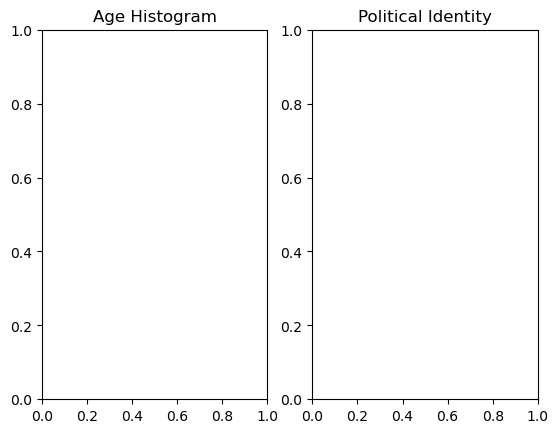

In [ ]:
fig1, axs1 = plt.subplots(1,2) #Creating the first figure - I used axs since we are making multiple axes. 1,2 tells it to create 1 row, but 2 columns for the axes
axs1[0].set_title("Age Histogram") #This is assigning the title for the axes at the 0th spot
axs1[1].set_title("Political Identity") #Same as above, but for the 1st spot
plt.show() #Lastly, telling Python to make the visualization

##### Evaluation Bar Figure

In [ ]:
evalgroups = ces.groupby("Evaluation").count()["caseid"] #I wanted a count of the Evaluation observations, so I did .count() by caseid
evalgroups

Evaluation
0    365
1     48
2    202
3     44
Name: caseid, dtype: int64

In [ ]:
evalgroups.values #Below is pulling the values from evalgroups and turning it into an array that I can feed into the bar chart

array([365,  48, 202,  44])

In [ ]:
evalgroups.index #Next I used .index to pull the row labels. This is what will be fed into the x axis later.

Index([0, 1, 2, 3], dtype='int64', name='Evaluation')

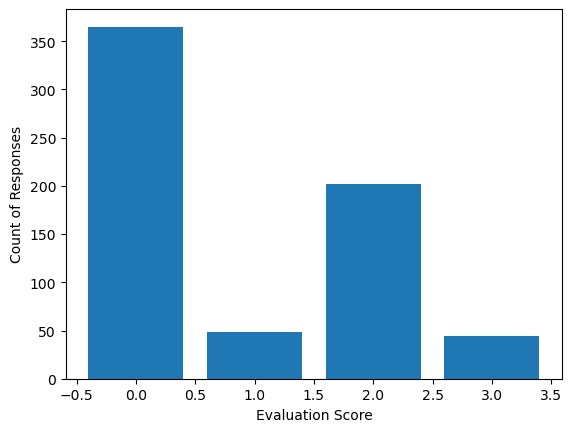

In [ ]:
fig2, ax2 = plt.subplots() #Creates the new figure - since we are using one axes, I just used ax2 instead
ax2.bar(x=evalgroups.index, height=evalgroups.values) #This is telling Python to create a bar chart and assign the evalgroups.index for the x value, and evalgroups.values for the height
ax2.set_xlabel("Evaluation Score") #This wasn't listed, but I wanted to try adding the x label
ax2.set_ylabel("Count of Responses") #Same as above, wanted to try using the y label
plt.show() #Lastly, telling Python to create the figure for me

##### ConMediaUse and ImmiPhobia Scatter Plot

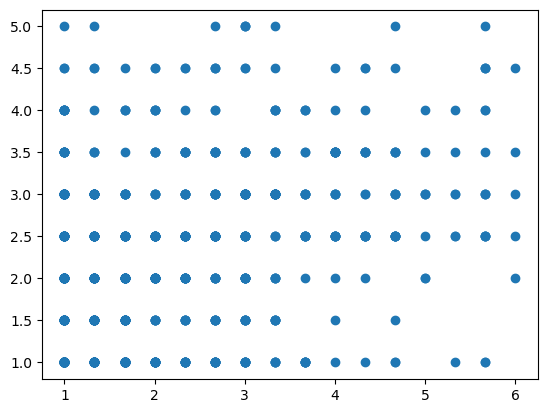

In [65]:
fig3, ax3 = plt.subplots() #Just like always, using fig and ax to create the figure and axes (using just ax since only doing 1), and subplots to make the figure
ax3.scatter(ces["ConMediaUse"],ces["ImmiPhobia"]) #Specifying that I want a scatterplot with .scatter, and then calling the variables for x (ConMediaUse) and y (ImmiPhobia)
plt.show() #Telling Python to make the visualization

##### Improving the ConMediaUse/ImmiPhobia Scatter Plot

The first part is coding, trying to figure out why the data is looking the way it does to help inform my recommendations for improvement. I added comments to help show the thought process for each part.

In [69]:
congroups = ces.groupby("ConMediaUse").count()["caseid"] #Asking to make a new column that groups the ConMediaUse column and tally the total number
congroups #Show the values so I can better understand the breakdown

ConMediaUse
1.000000    138
1.333333     79
1.666667     79
2.000000     55
2.333333     49
2.666667     50
3.000000     52
3.333333     38
3.666667     23
4.000000     23
4.333333     18
4.666667     19
5.000000      8
5.333333      7
5.666667     16
6.000000      5
Name: caseid, dtype: int64

In [70]:
immigroups = ces.groupby("ImmiPhobia").count()["caseid"] #Same as above - asking to make a new column that groups the ImmiPhobia column and tally the total number
immigroups #Show the values so I can better understand the breakdown

ImmiPhobia
1.0    146
1.5     74
2.0     99
2.5    110
3.0    107
3.5     60
4.0     31
4.5     23
5.0      9
Name: caseid, dtype: int64

After reviewing the scatter plot and considering the state of the figure, there are different properties we can introduce to the figure to help make it more appealling.

The first and most basic changes I would make is adding labels to the X axis and Y axis. This would help clarify what the figure is trying to show, that being how Conservative Media Usage (X axis) influences Immigrant Phobia (Y axis).

I would next consider introducing some jitter into the figure. This would help show that there are multiple different observations at each point (Wilke, 2019, Sect. 18.1). This is especially useful in this case considering the number of observations and how many lie at each point (thinking namely of the point at ConMediaUse = 1, ImmiPhobia = 1). I believe introducing jitter to this figure is OK since preciseness does not seem to be something that is critical to this figure. 

Another change that I would make is to the color of the dots. While introducing jitter alone would improve the figure, the figure would consist of a bunch of black blobs since there can be so many figures at each point. The first thing I would do is introduce some transparency to the dots. By utilizing transparency, areas with high concentrations of similar observations would be darker, and those with a lower concentration would appear lighter (Wilke, 2019, Sect. 18.1). Something else I would consider doing is changing the color of the dots. Since the data we are looking at is related to conservatives, I would propose changing the color to red. Touching on Arnheim (1974), this would be relevant to biological relevance since, in the US, the color red is associated with the Republican (conservative) party (Arnheim, 1974, pp. 50-1).

Something I did consider adjusting was the shape of the dots, but with the high concentration of results, I think it would still look like a blob and the differentation of shapes would become minimal. To counteract this, I would propose "splitting" the data into a matrix of two axes, and assigning a variable to each. A good candidate for this would be the "sex" column, as it appears to be a binary (1/2), so one figure could show the results of observations with a 1 in "sex," and the other with a 2 in "sex." (Wilke, 2019, Sect. 18.3). Accompanying this would need to be titles for each axes so viewers can understand the difference between the different axes. Doing this can not only help "de-clutter" the vfigure, but help further understanding of the data. Another eligible variable would be the "nonwhite" column. We could do something similar with the "education" and "age" columns, but the former we would need to understand what the numbers correspond to and the latter may involve breaking into age groups (i.e. 40-49, 50-59). These options would also require more figures depending on the number of categories we make.

##### Citations

Arnheim, R. (1974). *Art and visual perception: A psychology of the creative eye.* (Revised Ed.). University of California Press.

Wilke, C. (2019). *Fundamentals of data visualization: A primer on making informative and compelling figures*. O'Reilly Media.